In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the Data

In [2]:
data = pd.read_csv('Car_price_preprocessed.csv')
data

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,...,mpfi,spdi,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,0,0,0,0,0,0,0,0,...,1,0,3.19,3.40,10.0,102,5500,24,30,13950
1,2,164,0,0,0,0,0,0,0,0,...,1,0,3.19,3.40,8.0,115,5500,18,22,17450
2,1,158,0,0,0,0,0,0,0,0,...,1,0,3.19,3.40,8.5,110,5500,19,25,17710
3,1,158,0,0,0,0,0,0,0,0,...,1,0,3.13,3.40,8.3,140,5500,17,20,23875
4,2,192,1,0,0,0,0,0,0,0,...,1,0,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,-1,95,0,0,0,0,0,0,0,0,...,1,0,3.78,3.15,9.5,114,5400,23,28,16845
159,-1,95,0,0,0,0,0,0,0,0,...,1,0,3.78,3.15,8.7,160,5300,19,25,19045
160,-1,95,0,0,0,0,0,0,0,0,...,1,0,3.58,2.87,8.8,134,5500,18,23,21485
161,-1,95,0,0,0,0,0,0,0,0,...,0,0,3.01,3.40,23.0,106,4800,26,27,22470


## Exploring the PDFs

Let's first take a quick look at the descriptive statistics of our features, this will give us a first idea of whether there are significant outliers or not.

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
data.describe()

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,num-of-cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,159.000000,159.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.791411,121.840491,0.024540,0.018405,0.04908,0.079755,0.006135,0.092025,0.030675,0.06135,0.110429,0.042945,0.036810,0.006135,0.036810,0.073620,0.190184,0.04908,0.067485,0.092025,0.165644,0.417178,0.030675,0.368098,0.484663,0.104294,0.644172,0.306748,98.191411,172.330061,65.609816,53.793865,2459.914110,0.04908,0.754601,0.073620,0.04908,0.024540,4.184049,118.079755,0.386503,0.018405,0.092025,0.006135,0.398773,0.030675,3.300126,3.236352,10.142454,96.171779,5135.582822,26.282209,31.858896,11484.361963
std,1.229544,35.492292,0.155195,0.134825,0.21670,0.271748,0.078326,0.289951,0.172967,0.24071,0.314390,0.203357,0.188875,0.078326,0.188875,0.261956,0.393656,0.21670,0.251633,0.289951,0.372907,0.494612,0.172967,0.483774,0.501305,0.306584,0.480239,0.462565,5.123914,11.392353,1.923738,2.337818,476.085406,0.21670,0.431649,0.261956,0.21670,0.155195,0.747335,30.951571,0.488449,0.134825,0.289951,0.078326,0.491155,0.172967,0.267336,0.294888,3.842972,30.498855,480.088853,6.209818,6.532802,5816.860393
min,-2.000000,65.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,0.00000,0.000000,0.000000,0.00000,0.000000,2.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,166.000000,64.000000,52.000000,2087.500000,0.00000,1.000000,0.000000,0.00000,0.000000,4.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,22.000000,28.000000,7429.000000
50%,1.000000,115.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,96.600000,172.000000,65.400000,54.100000,2370.000000,0.00000,1.000000,0.000000,0.00000,0.000000,4.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.270000,3.270000,9.000000,90.000000,5200.000000,26.000000,32.000000,9279.000000
75%,2.000000,150.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,100.400000,177.800000,66.500000,55.500000,2793.000000,0.00000,1.000000,0.000000,0.00000,0.000000,4.000000,132.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.560000,3.410000,9.400000,114.

From the table above we can say that there are not many outliers in our numerical variables, but in order to confirm this hypothesis let's take a look at the PDFs.

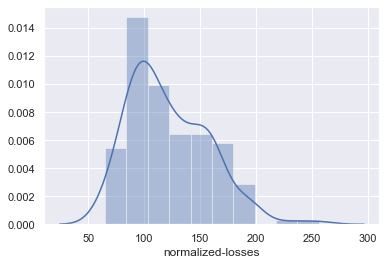

In [4]:
sns.distplot(data['normalized-losses'])
plt.show()

Let's get rid of the outliers that we see in the right side of the PDF.

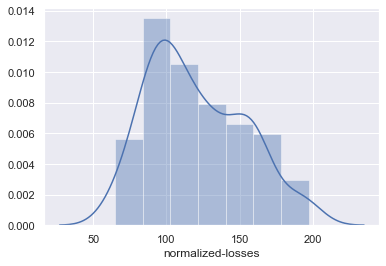

In [5]:
q = data['normalized-losses'].quantile(0.99)
data = data[data['normalized-losses']<q]
sns.distplot(data['normalized-losses'])
plt.show()

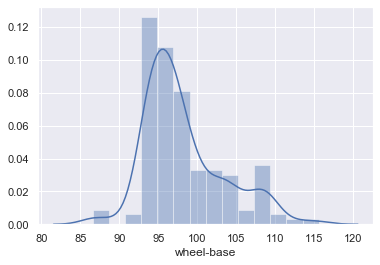

In [6]:
sns.distplot(data['wheel-base'])
plt.show()

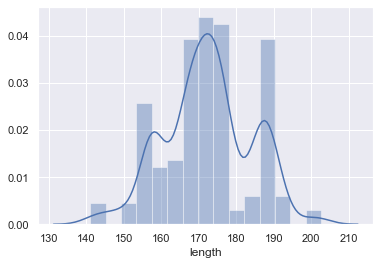

In [7]:
sns.distplot(data['length'])
plt.show()

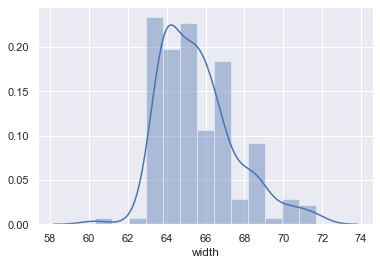

In [8]:
sns.distplot(data['width'])
plt.show()

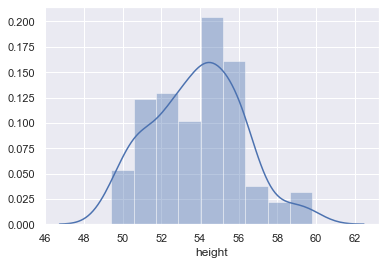

In [9]:
sns.distplot(data['height'])
plt.show()

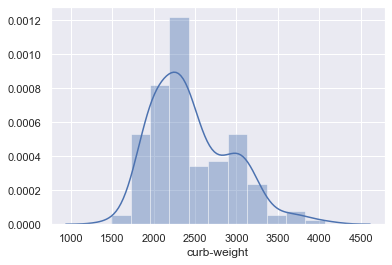

In [10]:
sns.distplot(data['curb-weight'])
plt.show()

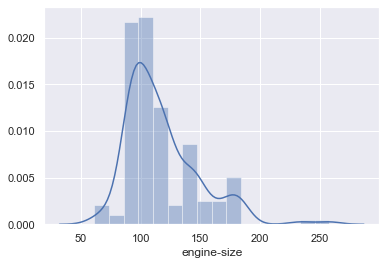

In [11]:
sns.distplot(data['engine-size'])
plt.show()

Repeating the same process for engine size as follows.

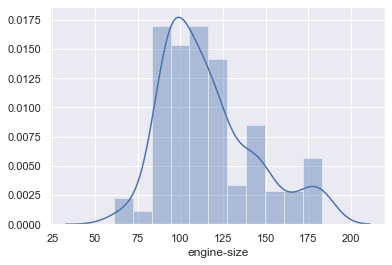

In [12]:
q = data['engine-size'].quantile(0.99)
data = data[data['engine-size']<q]
sns.distplot(data['engine-size'])
plt.show()

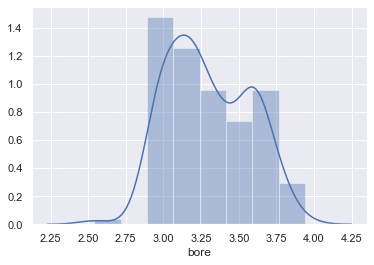

In [13]:
sns.distplot(data['bore'])
plt.show()

In this case we see that the outliers are in the left side, but the logic of the process is still the same, and we get rid of those outliers with the following piece of code.

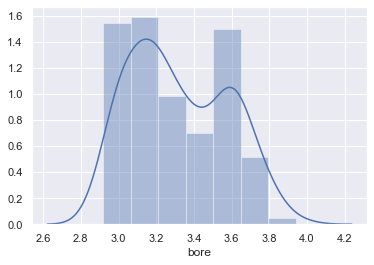

In [14]:
q = data['bore'].quantile(0.01)
data = data[data['bore']>q]
sns.distplot(data['bore'])
plt.show()

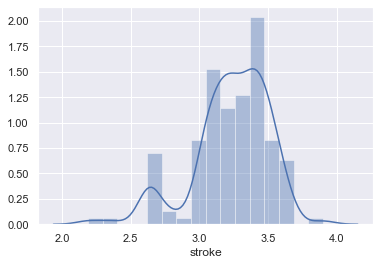

In [15]:
sns.distplot(data['stroke'])
plt.show()

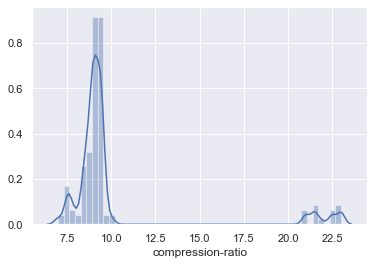

In [16]:
sns.distplot(data['compression-ratio'])
plt.show()

At first sight it seems like we have some outliers in the compression ratio feature, but a quick google search shows us that the common range for compression ratio for gas motors is 7-13 and for diesel motors is 16-24, so let's check if this explains what we see in the PDF.

In [17]:
data[data['compression-ratio'] >= 20]

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,num-of-cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
48,-1,93,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,110.0,190.9,70.3,56.5,3515,0,1,0,0,0,5,183,0,0,1,0,0,0,3.58,3.64,21.5,123,4350,22,25,25552
49,-1,93,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,110.0,190.9,70.3,58.7,3750,0,1,0,0,0,5,183,0,0,1,0,0,0,3.58,3.64,21.5,123,4350,22,25,28248
50,0,93,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,106.7,187.5,70.3,54.9,3495,0,1,0,0,0,5,183,0,0,1,0,0,0,3.58,3.64,21.5,123,4350,22,25,28176
51,-1,93,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,115.6,202.6,71.7,56.3,3770,0,1,0,0,0,5,183,0,0,1,0,0,0,3.58,3.64,21.5,123,4350,22,25,31600
64,1,128,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,94.5,165.3,63.8,54.5,2017,0,1,0,0,0,4,103,0,0,1,0,0,0,2.99,3.47,21.9,55,4800,45,50,7099
82,0,161,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,107.9,186.7,68.4,56.7,3197,1,0,0,0,0,4,152,0,0,1,0,0,0,3.70,3.52,21.0,95,4150,28,33,13200
84,0,161,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,107.9,186.7,68.4,56.7,3252,1,0,0,0,0,4,152,0,0,1,0,0,0,3.70,3.52,21.0,95,4150,28,33,16900
86,0,161,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,107.9,186.7,68.4,56.7,3252,1,0,0,0,0,4,152,0,0,1,0,0,0,3.70,3.52,21.0,95,4150,28,33,17950
121,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,95.7,166.3,64.4,53.0,2275,0,1,0,0,0,4,110,0,0,1,0,0,0,3.27,3.35,22.5,56,4500,34,36,7898
122,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,95.7,166.3,64.4,52.8,2275,0,1,0,0,0,4,110,0,0,1,0,0,0,3.27,3.35,22.5,56,4500,38,47,7788


In [18]:
data[data['compression-ratio'] <=13]

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,num-of-cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,4,109,0,0,0,0,1,0,3.19,3.40,10.00,102,5500,24,30,13950
1,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,5,136,0,0,0,0,1,0,3.19,3.40,8.00,115,5500,18,22,17450
2,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,5,136,0,0,0,0,1,0,3.19,3.40,8.50,110,5500,19,25,17710
3,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,5,131,0,0,0,0,1,0,3.13,3.40,8.30,140,5500,17,20,23875
4,2,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,4,108,0,0,0,0,1,0,3.50,2.80,8.80,101,5800,23,29,16430
5,0,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,4,108,0,0,0,0,1,0,3.50,2.80,8.80,101,5800,23,29,16925
6,0,188,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2710,0,1,0,0,0,6,164,0,0,0,0,1,0,3.31,3.19,9.00,121,4250,21,28,20970
7,0,188,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2765,0,1,0,0,0,6,164,0,0,0,0,1,0,3.31,3.19,9.00,121,4250,21,28,21105
9,1,98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,94.5,155.9,63.6,52.0,1874,0,1,0,0,0,4,90,1,0,0,0,0,0,3.03,3.11,9.60,70,5400,38,43,6295
10,0,81,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,94.5,158.8,63.6,52.0,1909,0,1,0,0,0,4,90,1,0,0,0,0,0,3.03,3.11,9.60,70,5400,38,43,6575


Just as expected, the two groups we saw in the compression ratio PDF where separated based on fuel type.

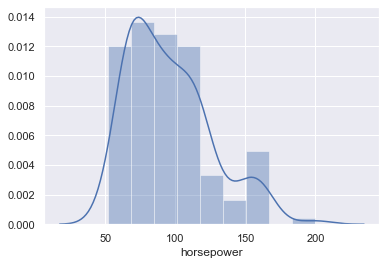

In [19]:
sns.distplot(data['horsepower'])
plt.show()

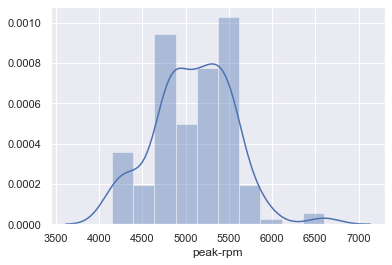

In [20]:
sns.distplot(data['peak-rpm'])
plt.show()

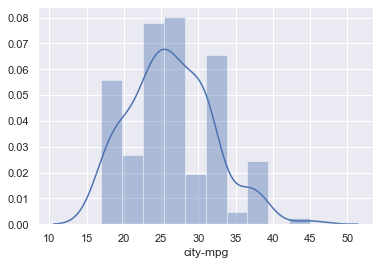

In [21]:
sns.distplot(data['city-mpg'])
plt.show()

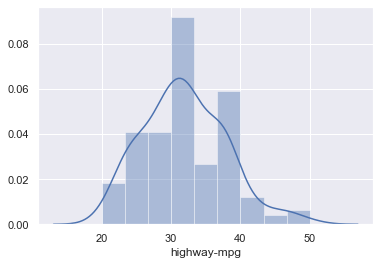

In [22]:
sns.distplot(data['highway-mpg'])
plt.show()

## Checking the OLS assumptions

Let's plot the numerical values against the price to see what kind of relationship we can observe.

In [23]:
data.columns.values

array(['symboling', 'normalized-losses', 'bmw', 'chevrolet', 'dodge',
       'honda', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'fuel-type', 'aspiration',
       'two-doors', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'num-of-cylinders',
       'engine-size', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'], dtype=object)

In [24]:
num_features = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

In [25]:
len(num_features)

16

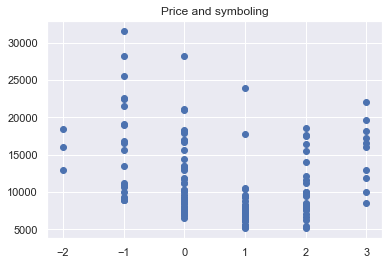

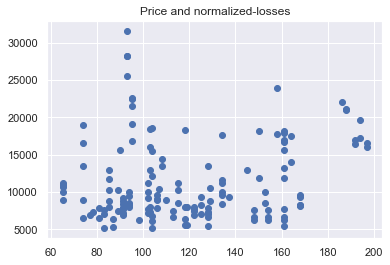

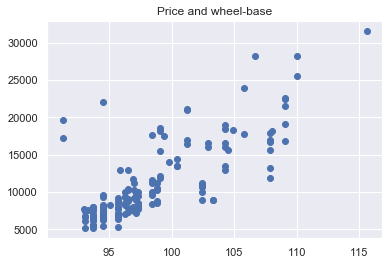

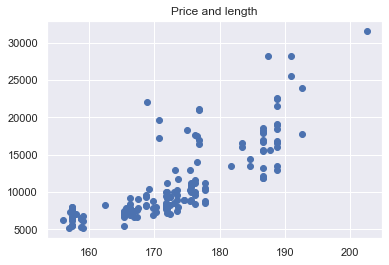

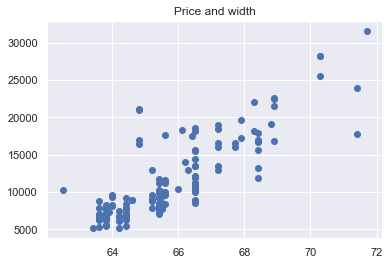

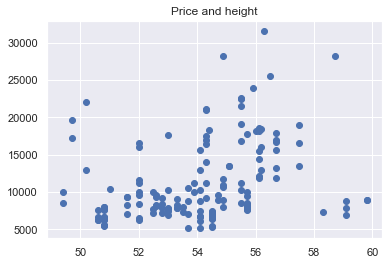

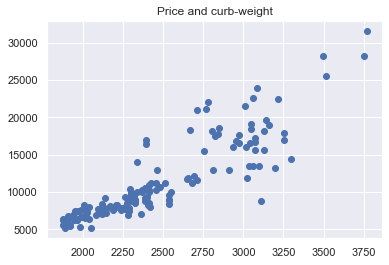

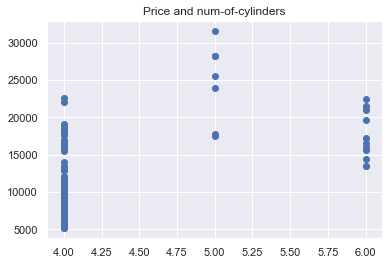

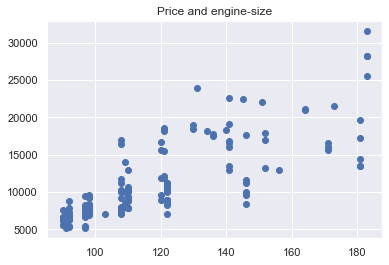

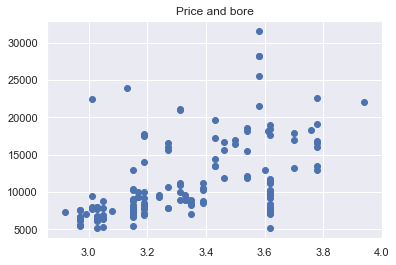

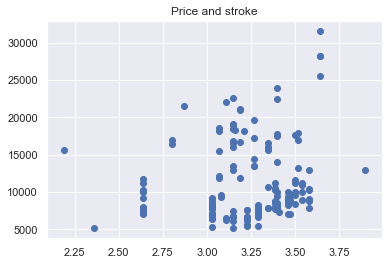

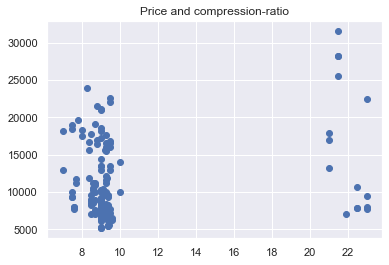

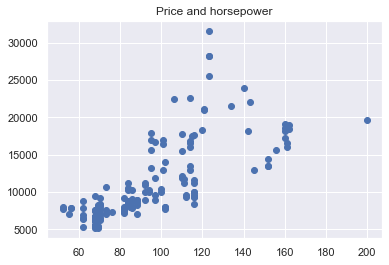

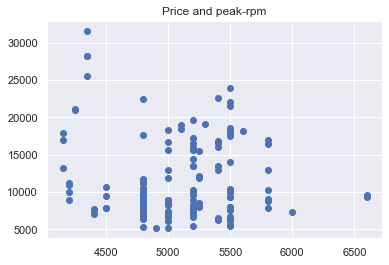

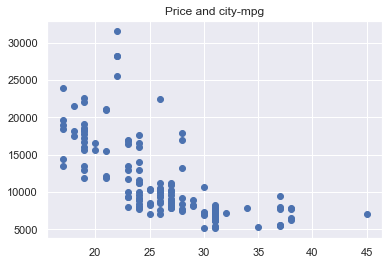

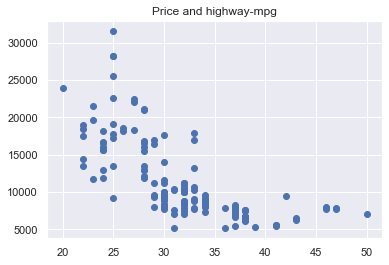

In [26]:
for i in range(16):
    plt.scatter(data[num_features[i]], data['price'])
    plt.title('Price and {}'.format(num_features[i]))
    plt.show()

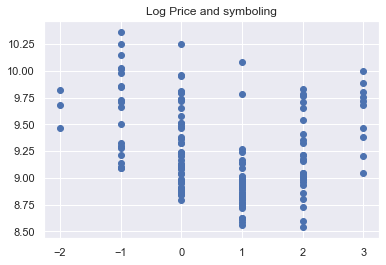

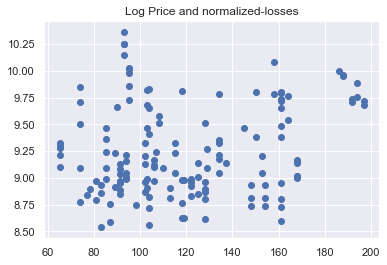

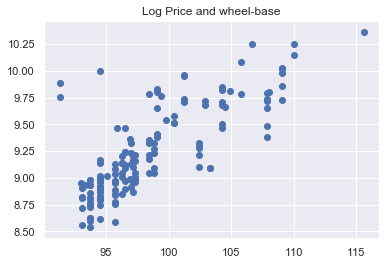

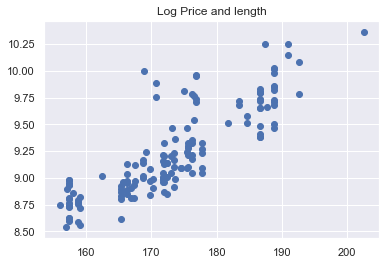

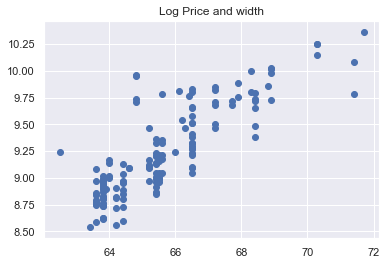

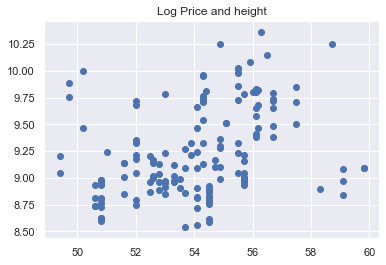

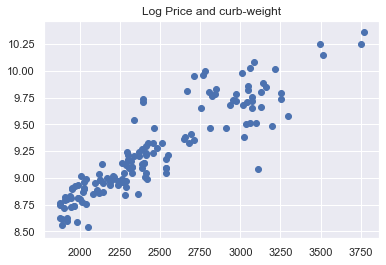

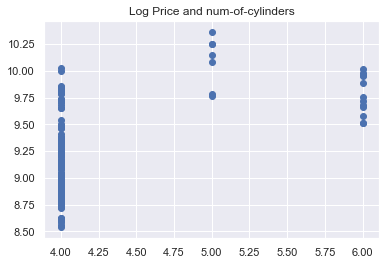

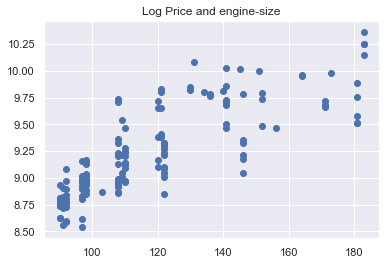

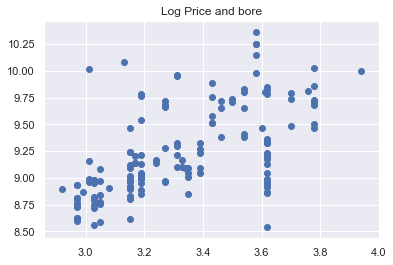

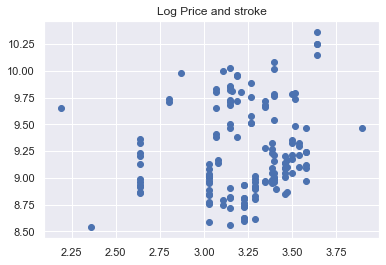

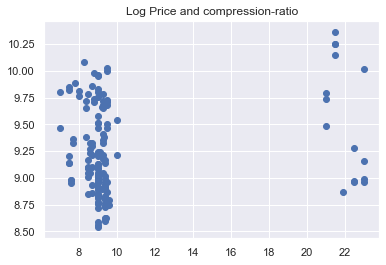

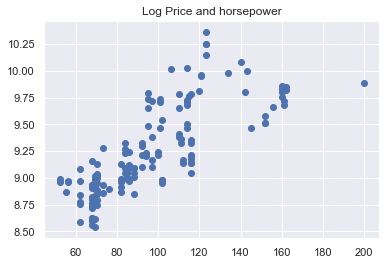

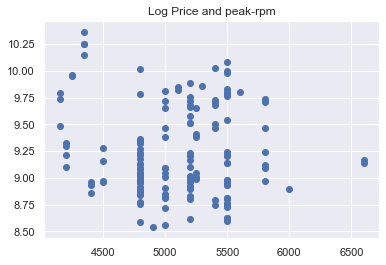

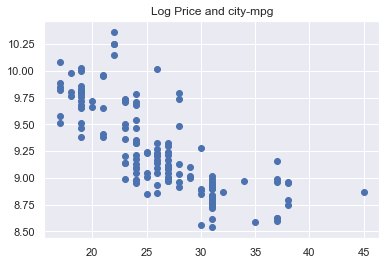

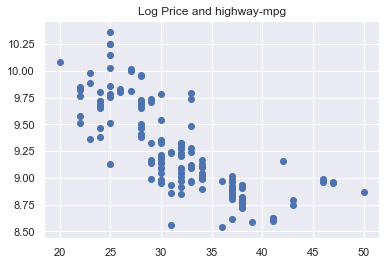

In [27]:
for i in range(16):
    plt.scatter(data[num_features[i]], np.log(data['price']))
    plt.title('Log Price and {}'.format(num_features[i]))
    plt.show()

C:\Users\judeg_000\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\judeg_000\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


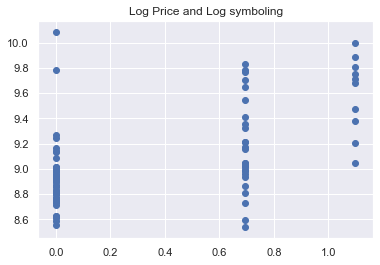

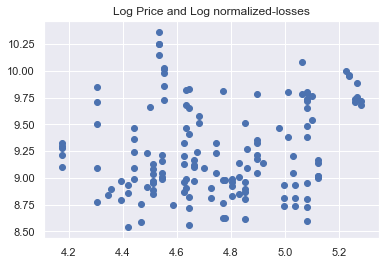

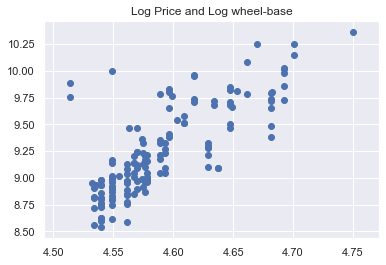

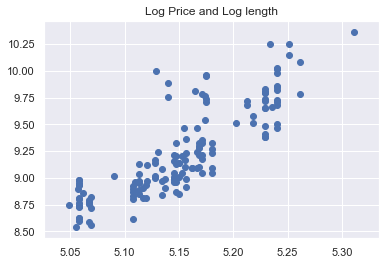

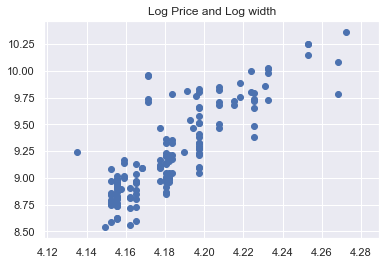

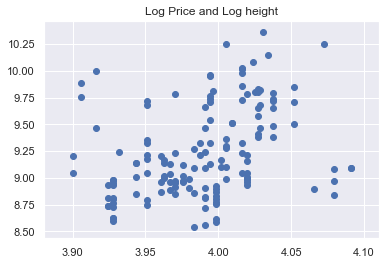

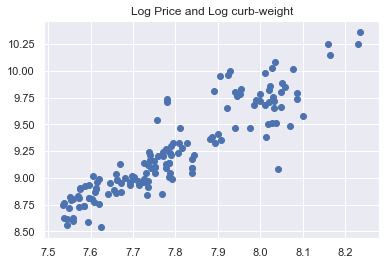

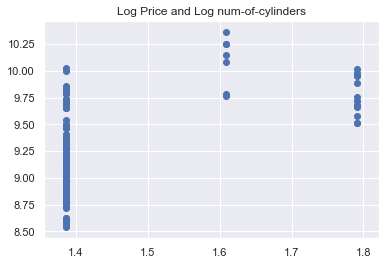

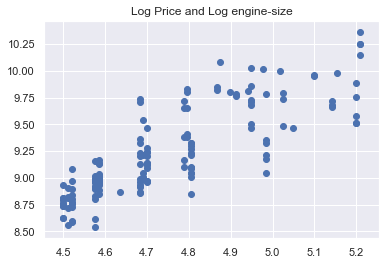

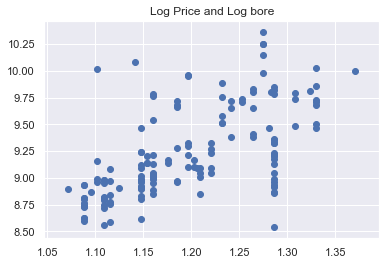

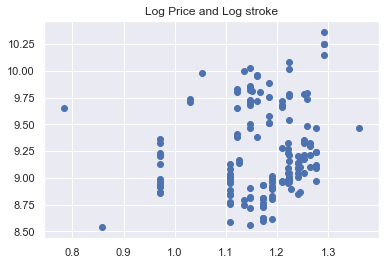

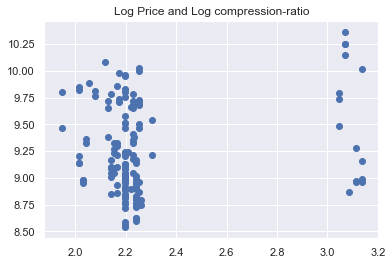

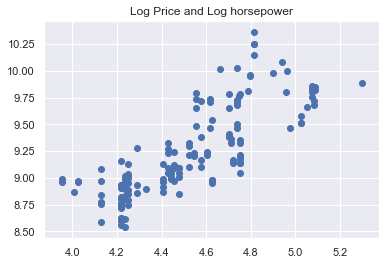

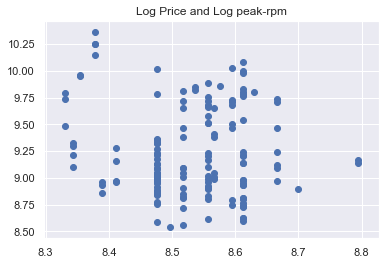

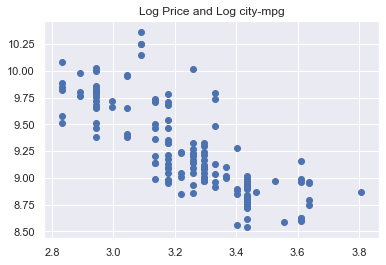

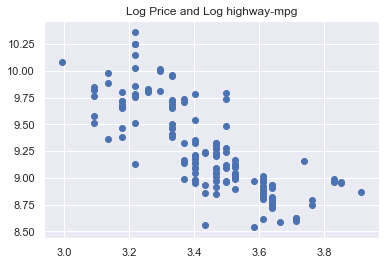

In [28]:
for i in range(16):
    plt.scatter(np.log(data[num_features[i]]), np.log(data['price']))
    plt.title('Log Price and Log {}'.format(num_features[i]))
    plt.show()

Based on the previous plots we can say that a log transformation for the dependent variable will relax the linearity assumption for most of our variables.

In [29]:
data['Log-price'] = np.log(data['price'])
data.drop(['price'], axis=1, inplace=True)
data.head()

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,num-of-cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Log-price
0,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,4,109,0,0,0,0,1,0,3.19,3.4,10.0,102,5500,24,30,9.543235
1,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,5,136,0,0,0,0,1,0,3.19,3.4,8.0,115,5500,18,22,9.767095
2,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,5,136,0,0,0,0,1,0,3.19,3.4,8.5,110,5500,19,25,9.781885
3,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,5,131,0,0,0,0,1,0,3.13,3.4,8.3,140,5500,17,20,10.080587
4,2,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,4,108,0,0,0,0,1,0,3.50,2.8,8.8,101,5800,23,29,9.706864


We can also see that some features aren't helpful to represent the behavior of the price, so we can just drop them.

In [30]:
data.drop(['compression-ratio'], axis=1, inplace=True)
data.drop(['stroke'], axis=1, inplace=True)
data.drop(['peak-rpm'], axis=1, inplace=True)
data.head()

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,num-of-cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,horsepower,city-mpg,highway-mpg,Log-price
0,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,4,109,0,0,0,0,1,0,3.19,102,24,30,9.543235
1,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,5,136,0,0,0,0,1,0,3.19,115,18,22,9.767095
2,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,5,136,0,0,0,0,1,0,3.19,110,19,25,9.781885
3,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,5,131,0,0,0,0,1,0,3.13,140,17,20,10.080587
4,2,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,4,108,0,0,0,0,1,0,3.50,101,23,29,9.706864


The plots also show that the number of cylinders just make a difference in the price in two case, when there are 4 cilinders and when there are more than four, based on this we can turn it into a binomial variable.

In [31]:
data['num-of-cylinders'].unique()

array([4, 5, 6], dtype=int64)

In [32]:
data['num-of-cylinders'] = data['num-of-cylinders'].map({4:0, 5:1, 6:1})
data.head()

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,num-of-cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,horsepower,city-mpg,highway-mpg,Log-price
0,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,0,109,0,0,0,0,1,0,3.19,102,24,30,9.543235
1,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,115,18,22,9.767095
2,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,110,19,25,9.781885
3,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,1,131,0,0,0,0,1,0,3.13,140,17,20,10.080587
4,2,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,0,108,0,0,0,0,1,0,3.50,101,23,29,9.706864


In [33]:
data = data.rename(columns={'num-of-cylinders':'+4 cylinders'})
data.head()

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,+4 cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,horsepower,city-mpg,highway-mpg,Log-price
0,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,0,109,0,0,0,0,1,0,3.19,102,24,30,9.543235
1,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,115,18,22,9.767095
2,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,110,19,25,9.781885
3,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,1,131,0,0,0,0,1,0,3.13,140,17,20,10.080587
4,2,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,0,108,0,0,0,0,1,0,3.50,101,23,29,9.706864


We can also take the logarithm of city-mpg and highway-mpg, but we can expect this variables to be highly correlated so let's just keep one of them.

In [34]:
data.drop(['city-mpg'], axis=1, inplace=True)
data['highway-mpg'] = np.log(data['highway-mpg'])
data.rename(columns={'highway-mpg':'Log highway-mpg'}, inplace=True)
data.head()

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,+4 cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,horsepower,Log highway-mpg,Log-price
0,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,0,109,0,0,0,0,1,0,3.19,102,3.401197,9.543235
1,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,115,3.091042,9.767095
2,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,110,3.218876,9.781885
3,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,1,131,0,0,0,0,1,0,3.13,140,2.995732,10.080587
4,2,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,0,108,0,0,0,0,1,0,3.50,101,3.367296,9.706864


In [35]:
data.head()

,symboling,normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,+4 cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,horsepower,Log highway-mpg,Log-price
0,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,0,109,0,0,0,0,1,0,3.19,102,3.401197,9.543235
1,2,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,115,3.091042,9.767095
2,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,110,3.218876,9.781885
3,1,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,1,131,0,0,0,0,1,0,3.13,140,2.995732,10.080587
4,2,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,0,108,0,0,0,0,1,0,3.50,101,3.367296,9.706864


Let's make an special transformation for symboling feature in order to make its relation with the log of price a bit more linear.

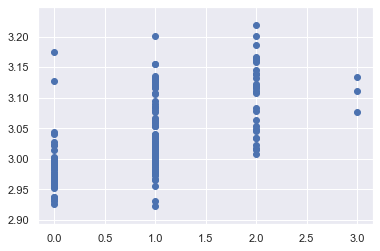

,abs(symb-1),normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,wheel-base,length,width,height,curb-weight,l,ohc,ohcf,ohcv,rotor,+4 cylinders,engine-size,2bbl,4bbl,idi,mfi,mpfi,spdi,bore,horsepower,Log highway-mpg,Log-price
0,1,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,99.8,176.6,66.2,54.3,2337,0,1,0,0,0,0,109,0,0,0,0,1,0,3.19,102,3.401197,9.543235
1,1,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,115,3.091042,9.767095
2,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,105.8,192.7,71.4,55.7,2844,0,1,0,0,0,1,136,0,0,0,0,1,0,3.19,110,3.218876,9.781885
3,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,105.8,192.7,71.4,55.9,3086,0,1,0,0,0,1,131,0,0,0,0,1,0,3.13,140,2.995732,10.080587
4,1,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,101.2,176.8,64.8,54.3,2395,0,1,0,0,0,0,108,0,0,0,0,1,0,3.50,101,3.367296,9.706864


In [36]:
plt.scatter(abs(data['symboling'] - 1) , data['Log-price'] ** 0.5)
plt.show()
data['symboling'] = abs(data['symboling'] - 1)
data.rename(columns={'symboling':'abs(symb-1)'}, inplace=True)
data.head()

In [37]:
linear_data = data.copy()

## Let's now check for multicolinearity with VIF

In [38]:
data.columns.values

array(['abs(symb-1)', 'normalized-losses', 'bmw', 'chevrolet', 'dodge',
       'honda', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'fuel-type', 'aspiration',
       'two-doors', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '+4 cylinders', 'engine-size',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'bore', 'horsepower',
       'Log highway-mpg', 'Log-price'], dtype=object)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['abs(symb-1)', 'normalized-losses',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'horsepower', 'Log highway-mpg']]

vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [40]:
vif

,Features,VIF
0,abs(symb-1),5.289567
1,normalized-losses,19.725090
2,wheel-base,2553.559107
3,length,2113.792737
4,width,4090.979014
5,height,1128.044736
6,curb-weight,344.751725
7,engine-size,125.410985
8,bore,333.377977
9,horsepower,58.714966


We start eliminating highly correlated features until we end just with the following:

In [41]:
variables = data[['abs(symb-1)','normalized-losses']]

vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [42]:
vif

,Features,VIF
0,abs(symb-1),2.137447
1,normalized-losses,2.137447


Based on the VIFs values seen above we'll proceed to drop every numerical feature except for 'abs(symb-1)' and 'normalized-loss'.

In [43]:
for i in ['wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'horsepower', 'Log highway-mpg']:
    data.drop([i], axis=1, inplace=True)
data.head()

,abs(symb-1),normalized-losses,bmw,chevrolet,dodge,honda,jaguar,mazda,mercedes-benz,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,fuel-type,aspiration,two-doors,hardtop,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor,+4 cylinders,2bbl,4bbl,idi,mfi,mpfi,spdi,Log-price
0,1,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,9.543235
1,1,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,9.767095
2,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,9.781885
3,0,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,10.080587
4,1,192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,9.706864


## Linear Regression Model

In [44]:
targets = data['Log-price']
inputs = data.drop(['Log-price'], axis=1)

We'll first split our data into training and test data, because this way we avoid "Data Leakage" when scaling.

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=97)

Let's now scale our input data.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
x_train

array([[ 0.04424281, -1.15840985, -0.16222142, ..., -0.09284767,
        -0.79056942, -0.18814417],
       [ 0.04424281, -0.510365  , -0.16222142, ..., -0.09284767,
         1.26491106, -0.18814417],
       [ 0.04424281, -0.75723923, -0.16222142, ..., -0.09284767,
         1.26491106, -0.18814417],
       ...,
       [-1.2498593 , -0.17091293, -0.16222142, ..., -0.09284767,
        -0.79056942, -0.18814417],
       [ 0.04424281, -0.84981706, -0.16222142, ..., -0.09284767,
        -0.79056942, -0.18814417],
       [ 0.04424281, -0.510365  , -0.16222142, ..., -0.09284767,
        -0.79056942, -0.18814417]])

In [48]:
x_test

array([[ 0.04424281,  1.31033245, -0.16222142, ..., -0.09284767,
        -0.79056942, -0.18814417],
       [ 0.04424281,  2.14353298,  6.164414  , ..., -0.09284767,
         1.26491106, -0.18814417],
       [ 1.33834492, -0.72637995, -0.16222142, ..., -0.09284767,
         1.26491106, -0.18814417],
       ...,
       [-1.2498593 , -0.47950572, -0.16222142, ..., -0.09284767,
        -0.79056942, -0.18814417],
       [ 0.04424281, -0.84981706, -0.16222142, ..., -0.09284767,
        -0.79056942, -0.18814417],
       [ 1.33834492,  2.32868865, -0.16222142, ..., -0.09284767,
         1.26491106, -0.18814417]])

## Creating the regression

In [49]:
from sklearn.linear_model import LinearRegression
reg =  LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_hat = reg.predict(x_train)

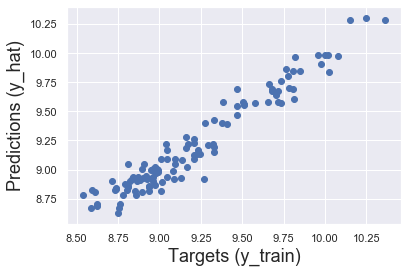

In [51]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

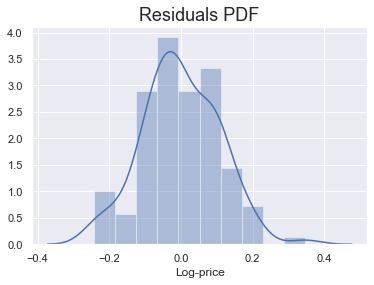

In [52]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

As expected the residuals are pretty much normally distributed, so we are safe to continue.

Let's now find the R-Squared of our model.

In [53]:
reg.score(x_train, y_train)

0.9369674864697324

The model seems to perform really good on the train data but we still have to check its performance in the test data which will give us the final accuracy.

## Finding the weights and bias

In [54]:
reg.intercept_

9.209700084577934

In [55]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,abs(symb-1),9.083324e-02
1,normalized-losses,2.420655e-02
2,bmw,-1.826517e-02
3,chevrolet,-6.139344e-02
4,dodge,-9.957846e-02
5,honda,7.820338e-04
6,jaguar,-1.959233e+12
7,mazda,-5.805834e-02
8,mercedes-benz,-7.092005e-03
9,mitsubishi,-1.182093e-01


## Testing the model

In [56]:
y_hat_test = reg.predict(x_test)

We'll now generate the same plot than before but now for the test data.

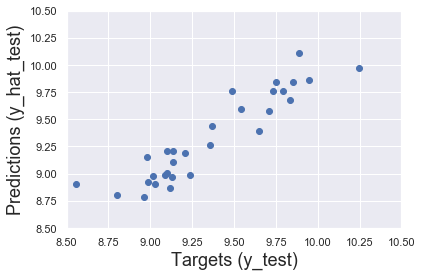

In [57]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(8.5,10.5)
plt.ylim(8.5,10.5)
plt.show()

The plot seems pretty good but let's put a number on the accuracy of our model.

In [58]:
reg.score(x_test, y_test)

0.8439533075053115

Awesome! Our model has almost 85% of accuracy in our test data, which comes to be a pretty good performance for a Linear Model.

Let's also generate a table to meassure the difference between our predicted values and the targets.

In [59]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,17322.940698
1,19131.194969
2,18779.494560
3,7946.525586
4,7095.448698


In [60]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)

In [61]:
df_pf

,Prediction,Target
0,17322.940698,13200.0
1,19131.194969,20970.0
2,18779.494560,19045.0
3,7946.525586,8238.0
4,7095.448698,9095.0
5,17322.940698,17950.0
6,6536.633646,7799.0
7,10503.524549,11549.0
8,9973.714275,9298.0
9,12558.802444,11694.0


In [62]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,17322.940698,13200.0,-4122.940698,31.234399
1,19131.194969,20970.0,1838.805031,8.768741
2,18779.494560,19045.0,265.505440,1.394095
3,7946.525586,8238.0,291.474414,3.538170
4,7095.448698,9095.0,1999.551302,21.985171
5,17322.940698,17950.0,627.059302,3.493367
6,6536.633646,7799.0,1262.366354,16.186259
7,10503.524549,11549.0,1045.475451,9.052519
8,9973.714275,9298.0,-675.714275,7.267308
9,12558.802444,11694.0,-864.802444,7.395266


In [63]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,30.000000,30.000000,30.000000,30.000000
mean,12197.060828,12570.066667,373.005839,12.555314
std,5124.207997,5344.947107,2203.009902,9.829788
min,6536.633646,5195.000000,-4986.179904,0.151166
25%,7966.021323,8870.750000,-761.574196,5.711132
50%,9998.123708,10141.500000,379.752166,9.446571
75%,16988.383450,16803.750000,1332.599760,18.488034
max,24685.179904,28176.000000,6785.023484,41.469389


By looking at the descriptive statistics we can see that our average difference is 12.6%, which along with the test R-Squared of 84.4% leads to the consideration that the predictive analysis has been succesful.

## Generating Files for Deployment

Our final step will be generating a couple of files that will allow us to use both the model and the scaler when we want to make predictions on new data.

In [64]:
import pickle

# pickle the model file
with open('model', 'wb') as file:
    pickle.dump(reg, file)

# pickle the scaler file
with open('scaler','wb') as file:
    pickle.dump(scaler, file)